# Homework 2 notes

---

## General remarks

### Use relative paths

### Use Markdown effectively to communicate structure of the document

General text

### File naming convention

From the next HW we will use the naming convention `BIOE806-HW03-FirstnameLastname.zip`.

## 1. Final project

Your project should be challenging, but approachable this semester.  You need to have the
data in hand by the end of this month, and I should be able to see the data as I will run
your code to generate your final report.

## 2. Creating a factor from a numeric variable

### Read in the data; report the types of all variables.

We first read in the data.

In [1]:
dryadFileDownload <- function(filenum,filename,baseurl="https://datadryad.org/api/v2")
{
    download.file(paste(baseurl,"/files/",filenum,"/download",sep=""),filename,mode="wb")
}
## make a temporaty filename with csv extension
tmpfile <- tempfile(fileext="csv")
## download that file
dryadFileDownload("2545788",tmpfile)
## read in the file
uric <- read.csv(tmpfile)
# examine first few lines
head(uric)

ID sex Age BMI   SBP DBP FBG  TC   Cr GFR     UA  Times hypertension
1 1  2   79  24.35 132 83  6.20 4.65 54 116.182 284 1     1           
2 1  2   81  25.24 136 85  6.09 4.97 95  57.605 208 2     1           
3 1  2   83  23.43 120 86  6.16 4.92 66  89.899 230 3     1           
4 1  2   85  24.70 144 80  6.24 5.15 50 126.093 199 4     2           
5 2  2   63  27.27 120 73  5.37 4.08 63 100.027 247 1     1           
6 2  2   65  25.92 120 74  5.25 4.74 74  81.554 326 2     1           
  hyperglycemia dyslipidemia
1 1             1           
2 1             1           
3 1             1           
4 1             1           
5 1             1           
6 1             1

Note the types of the variables.

### Calculate the quintiles of DBP using the quantile command. Quintiles are the 20th, 40th, 60th and 80th percentiles.

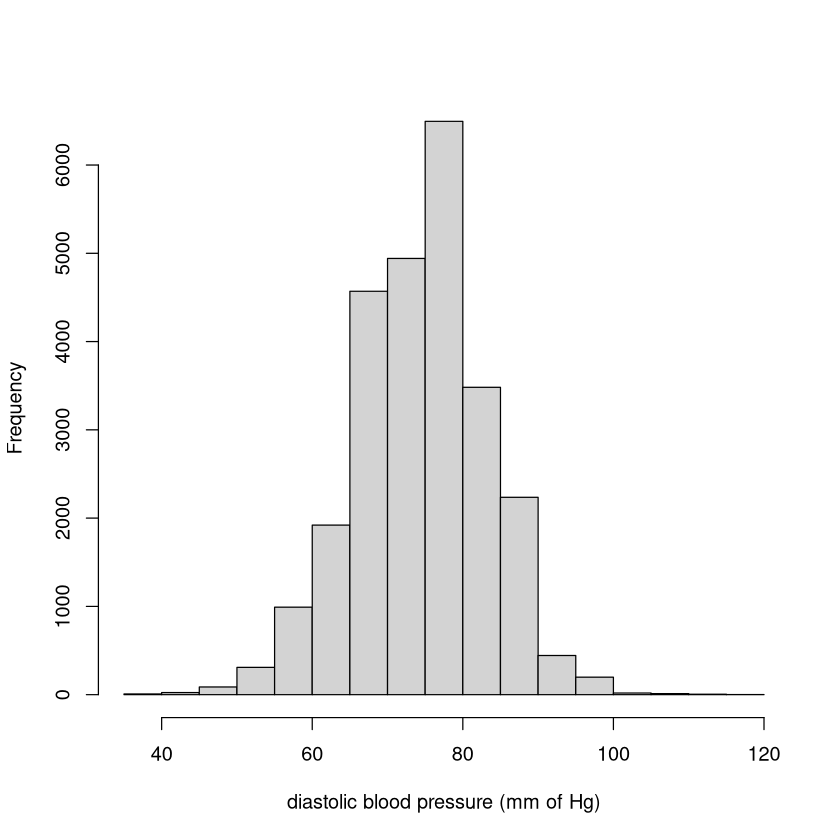

In [2]:
hist(uric$DBP,main="",xlab="diastolic blood pressure (mm of Hg)")

In [3]:
( dbpQuantiles <- quantile(uric$DBP,prob=c(0,20,40,60,80,100)/100) ) |> print()

  0%  20%  40%  60%  80% 100% 
  36   68   73   78   82  116 


In [4]:
dbpQuantiles

0%  20%  40%  60%  80% 100% 
  36   68   73   78   82  116

### Use the cut command to make a factor variable from DBP. Label them q1 through q5. There should be five categories. Use the table command to tabulate this variable.

In [5]:
dbpQuintileFactor <- cut(uric$DBP,breaks=dbpQuantiles,
                        labels=paste("q",1:5,sep=""))

In [6]:
table(dbpQuintileFactor)

dbpQuintileFactor
  q1   q2   q3   q4   q5 
5262 5400 5438 4853 4788 

In [7]:
uric$dbpQuintileFactor <- dbpQuintileFactor

### Perform linear regression of SBP on the quantile categories of DBP. Is the association positive or negative?

In [8]:
( out1 <- lm(SBP~dbpQuintileFactor,data=uric) ) |> summary()


Call:
lm(formula = SBP ~ dbpQuintileFactor, data = uric)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.244  -8.099  -0.330   7.670  73.272 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         117.7281     0.1611  730.85   <2e-16 ***
dbpQuintileFactorq2   4.2357     0.2263   18.71   <2e-16 ***
dbpQuintileFactorq3   8.3705     0.2260   37.05   <2e-16 ***
dbpQuintileFactorq4  10.6018     0.2326   45.59   <2e-16 ***
dbpQuintileFactorq5  17.5161     0.2334   75.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.68 on 25736 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.2003,	Adjusted R-squared:  0.2002 
F-statistic:  1612 on 4 and 25736 DF,  p-value: < 2.2e-16


### Using the relevel command, make the middle quintile (q3) the reference category. In many situations, it is more natural to have the middle category as the reference. 

In [9]:
uric$dbpQuintileFactor <- relevel(uric$dbpQuintileFactor, ref="q3")

### Repeat the linear regression, and explain the new regression coefficients using the previous regression output.

In [10]:
( out2 <- lm(SBP~dbpQuintileFactor,data=uric) ) |> summary()


Call:
lm(formula = SBP ~ dbpQuintileFactor, data = uric)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.244  -8.099  -0.330   7.670  73.272 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         126.0986     0.1585  795.80   <2e-16 ***
dbpQuintileFactorq1  -8.3705     0.2260  -37.05   <2e-16 ***
dbpQuintileFactorq2  -4.1349     0.2245  -18.42   <2e-16 ***
dbpQuintileFactorq4   2.2313     0.2307    9.67   <2e-16 ***
dbpQuintileFactorq5   9.1456     0.2316   39.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.68 on 25736 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.2003,	Adjusted R-squared:  0.2002 
F-statistic:  1612 on 4 and 25736 DF,  p-value: < 2.2e-16


### (Optional) Repeat the above steps by dividing the range of DBP into equal sized bins (instead of quintiles). The width of the bins will be the same, but the number of individuals in the bins will vary.

In [11]:
uric$dbpCatFactor <- cut(uric$DBP,breaks=seq(min(uric$DBP),max(uric$DBP),by=10))

In [12]:
table(uric$dbpCatFacto)


  (36,46]   (46,56]   (56,66]   (66,76]   (76,86]   (86,96]  (96,106] (106,116] 
       43       470      3406     10026      9534      2093       153        16 

In [13]:
( out3 <- lm(SBP~dbpCatFactor,data=uric) ) |> summary()


Call:
lm(formula = SBP ~ dbpCatFactor, data = uric)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.101  -8.158  -0.158   7.568  73.899 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            115.721      1.785  64.824  < 2e-16 ***
dbpCatFactor(46,56]     -0.272      1.865  -0.146    0.884    
dbpCatFactor(56,66]      1.380      1.796   0.768    0.442    
dbpCatFactor(66,76]      7.169      1.789   4.007 6.16e-05 ***
dbpCatFactor(76,86]     13.437      1.789   7.510 6.11e-14 ***
dbpCatFactor(86,96]     21.712      1.803  12.039  < 2e-16 ***
dbpCatFactor(96,106]    31.155      2.021  15.419  < 2e-16 ***
dbpCatFactor(106,116]   38.217      3.428  11.148  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.71 on 25733 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1975,	Adjusted R-squared:  0.1973 
F-statistic: 904.9 on 7 and 25733 DF,  p

In [14]:
sbpMean <- tapply(uric$SBP,uric$dbpCatFactor,mean) 

In [15]:
sbpSD <- tapply(uric$SBP,uric$dbpCatFactor,sd)
sbpN <- tapply(uric$SBP,uric$dbpCatFactor,length)

In [16]:
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




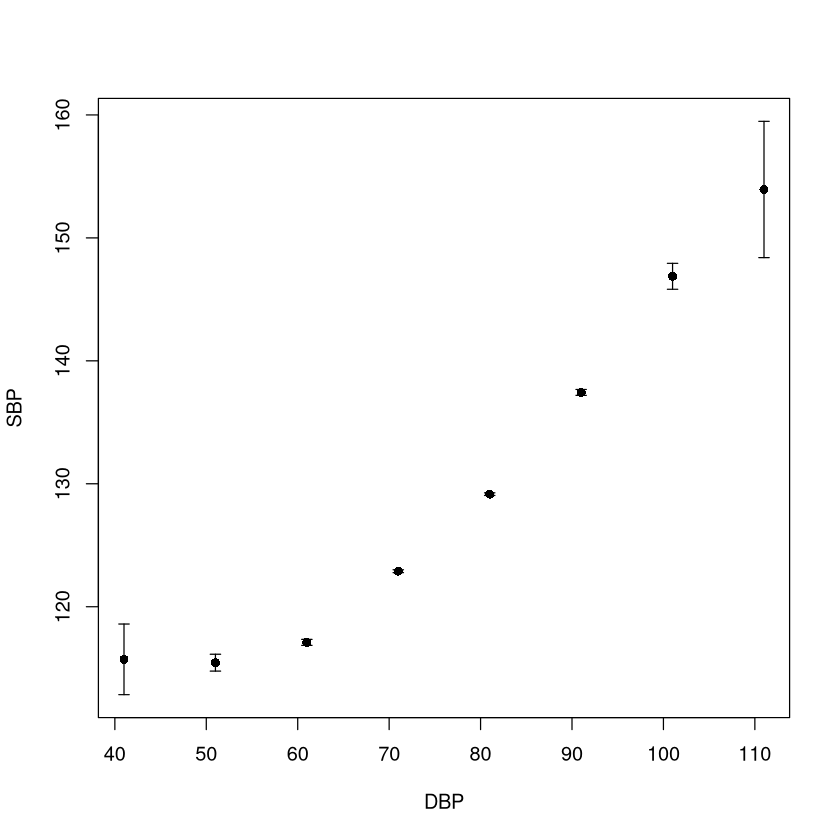

In [17]:
errbar(seq(41,111,by=10),sbpMean,sbpMean+sbpSD/sqrt(sbpN),sbpMean-sbpSD/sqrt(sbpN),xlab="DBP",ylab="SBP")

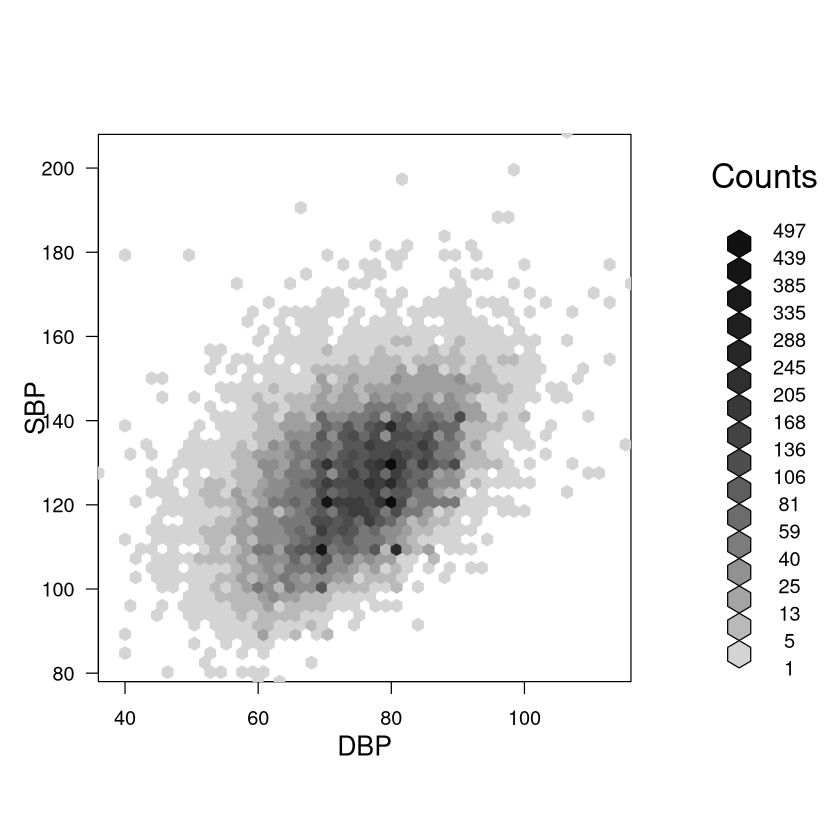

In [18]:
library(scales)
library(hexbin)
hexbin(uric$DBP,uric$SBP,xbins = 50) |>
    gplot.hexbin(x=_,trans=sqrt,inv=\(x) x^2,xlab="DBP",ylab="SBP")

In [19]:
outLoess <- loess(SBP~DBP,data=uric,span=0.5)

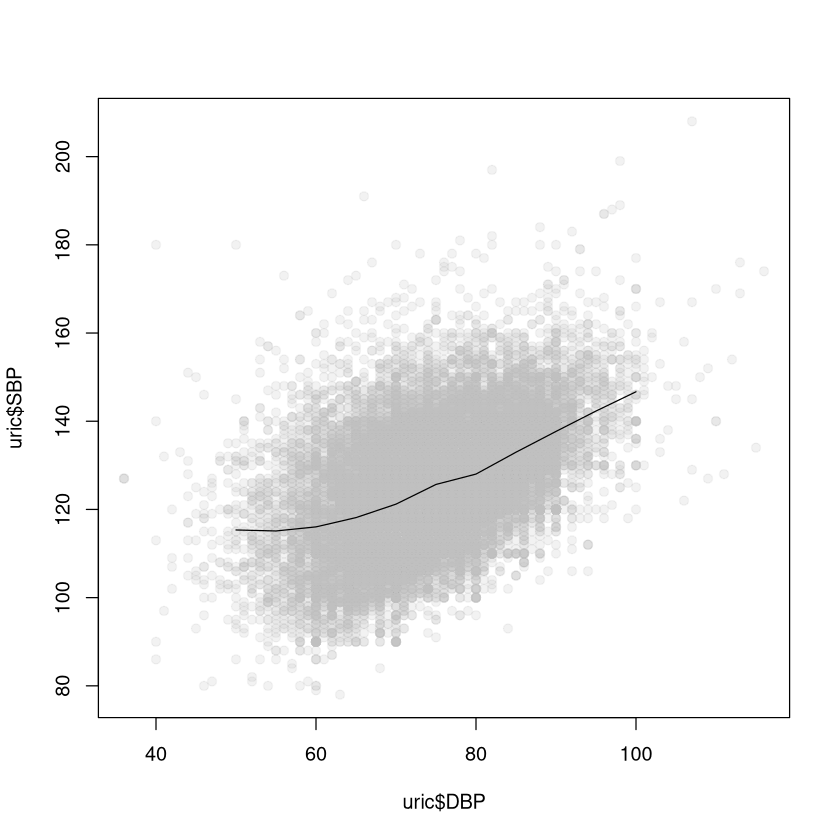

In [20]:
plot(uric$DBP,uric$SBP,col=alpha("grey",0.2),pch=19,cex=1)
lines(seq(50,100,by=5),predict(outLoess,newdata=data.frame(DBP=seq(50,100,by=5))))